## Imports

In [151]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [152]:
# Importing dataframes
df_csv = pd.read_csv('data/measurements.csv')
df_xlsx = pd.read_excel('data/measurements2.xlsx')

## First glance

Exploring columns, rows, and if the two dataframes are the same. They seem to be the same, so I will be working with only one of them.

In [153]:
df_csv

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [154]:
df_xlsx

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [155]:
# From here on, will be working with the xlsx version 
# (Contents are identical, but the formatting seams already more appropriate in that one)
df = df_xlsx.copy()

## Exploratory data analysis

- Getting to know the domain
- Exploring the data
- Cleaning the data
- Taking a look and finding connections between data

#### Getting to know the domain

In [156]:
# Extracted background information about the dataset

'''
I write down the data of my car's display after each ride; while changing the gas type. 
In the file, you will find...
- the displayed distance (km)
- the consume (L/100km)
- the average speed (km/h)
- the temperature i had inside (°C)
- the temperature outside (°C)

...anything special that happened...
- if it was raining
- if the air condition was on
- if it was sunny enough that the car felt warm when i started it
- the gas type i was using

I have also two columns saying how much and which gas type I was buying. Careful with those. 
The numbers don't add exactly up, I note only the rides that occur under certain conditions: 
If the car was not cooling down enough to have another independent measure from the one before,
I don't note it.

I started writing down the data in November, changed to SP98 in winter, back to E10 in spring. 
Apart from that, the data is rather clean as i was doing my own project on it already.
'''

"\nI write down the data of my car's display after each ride; while changing the gas type. \nIn the file, you will find...\n- the displayed distance (km)\n- the consume (L/100km)\n- the average speed (km/h)\n- the temperature i had inside (°C)\n- the temperature outside (°C)\n\n...anything special that happened...\n- if it was raining\n- if the air condition was on\n- if it was sunny enough that the car felt warm when i started it\n- the gas type i was using\n\nI have also two columns saying how much and which gas type I was buying. Careful with those. \nThe numbers don't add exactly up, I note only the rides that occur under certain conditions: \nIf the car was not cooling down enough to have another independent measure from the one before,\nI don't note it.\n\nI started writing down the data in November, changed to SP98 in winter, back to E10 in spring. \nApart from that, the data is rather clean as i was doing my own project on it already.\n"

In [157]:
# Important for research question: How many different gas types are we dealing with?
# Turns out we are dealing with 2 types (descriptions in parantheses): 
# - SP98 (sold as "Super plus" sometimes) -> This is the 'standard' option
# - SP95 E10 ("super" gas with 10% Alcohol) -> This is the 'alternative' ethanol option
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

#### Exploring the data

In [158]:
# Quick overview of datatypes
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [159]:
# Quick overview of variables - numeric
df.describe()
#df.describe(include='all')

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [160]:
# Quick overview of variables - categorical
for column in df.select_dtypes(include='object').columns:
    print(f'\n{column}:\n{df[column].value_counts()}')


specials:
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

gas_type:
SP98    228
E10     160
Name: gas_type, dtype: int64

refill gas:
SP98    8
E10     5
Name: refill gas, dtype: int64


array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'consume'}>,
        <Axes: title={'center': 'speed'}>],
       [<Axes: title={'center': 'temp_inside'}>,
        <Axes: title={'center': 'temp_outside'}>,
        <Axes: title={'center': 'AC'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'sun'}>,
        <Axes: title={'center': 'refill liters'}>]], dtype=object)

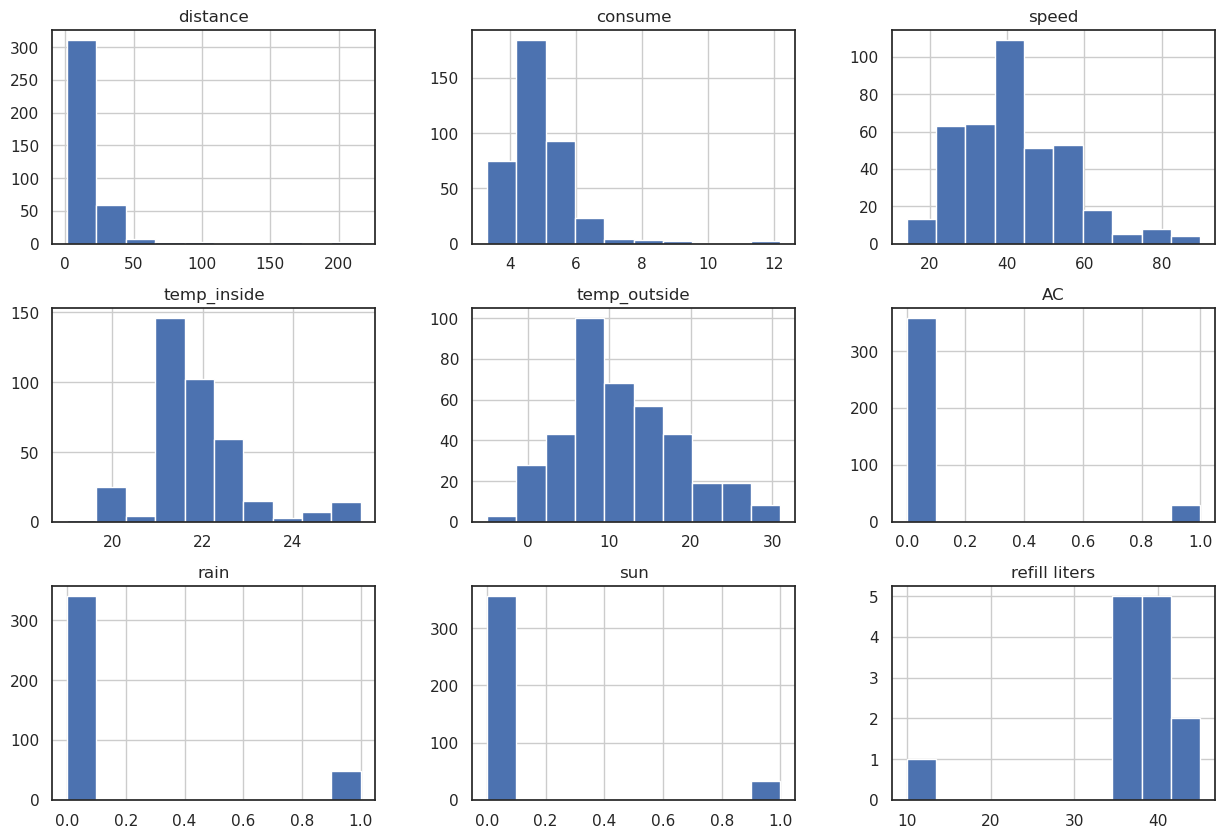

In [161]:
# Quick overview of distributions (numerical variables incl. dummy-encoded)
df.hist(figsize=(15,10))

#### Cleaning the data

In [162]:
# Renaming columns (including metric as additional useful information for interpretation)
df.columns = ['distance_km', 'avg_consume_l', 'avg_speed_kmh', 'temp_inside_C', 'temp_outside_C',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill_l',
       'refill_gas_type']

In [163]:
# Checking for missing values
df.isna().sum()

distance_km          0
avg_consume_l        0
avg_speed_kmh        0
temp_inside_C       12
temp_outside_C       0
specials           295
gas_type             0
AC                   0
rain                 0
sun                  0
refill_l           375
refill_gas_type    375
dtype: int64

In [164]:
# Exploring refill columns
print(df['refill_l'].value_counts())
print()
print(df['refill_gas_type'].value_counts())

45.0    2
37.7    2
39.0    2
37.6    1
38.0    1
38.3    1
10.0    1
41.0    1
37.0    1
37.2    1
Name: refill_l, dtype: int64

SP98    8
E10     5
Name: refill_gas_type, dtype: int64


In [165]:
# Dropping refill columns (I don't see the additional value for the analysis for now)
df = df.drop(['refill_l', 'refill_gas_type'], axis=1)

In [166]:
# Exploration of 'specials' recoding 
# (It makes sense like this - snow seems to be integrated into rain as well)
# (With more time, we could double check the encoding here, I am skipping this for now)
for column in df[['AC', 'rain', 'sun']].columns:
    print(df[column].value_counts())
    print()

0    358
1     30
Name: AC, dtype: int64

0    340
1     48
Name: rain, dtype: int64

0    356
1     32
Name: sun, dtype: int64



In [167]:
# Renaming 'rain' column
df = df.rename(columns={'rain': 'rain_snow'})

In [168]:
# Dropping 'specials' column
df = df.drop('specials', axis=1)

<Axes: >

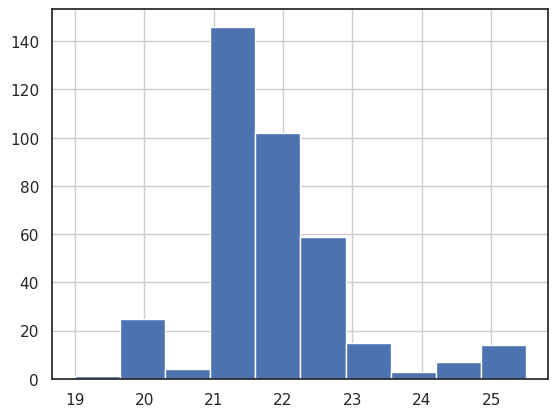

In [169]:
# Exploring 'temp inside' distribution
# (Decision: Replacing missing values with median of the values seems to be of low risk)
df['temp_inside_C'].hist()

In [170]:
# Replacing missing values in 'temp_inside_C' variable (and turning datatype into integer)
df['temp_inside_C'] = df['temp_inside_C'].fillna(df['temp_inside_C'].median())
df['temp_inside_C'] = df['temp_inside_C'].astype(int)

In [171]:
# Turning 'gas_type' into numerical values
df['gas_type'] = df['gas_type'].apply(lambda x: 0 if x=='SP98' else 1)
df['gas_type'].value_counts()

0    228
1    160
Name: gas_type, dtype: int64

In [172]:
# Adding another column with the total cost of each trip
# (Cost information from description: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter)
df['cost_per_l'] = df['gas_type'].apply(lambda x: 1.46 if x==0 else 1.38)
df['trip_costs_EUR'] = df['avg_consume_l'] * df['distance_km']/100 * df['cost_per_l']

In [173]:
# Adding another column with the cost per kilometer of each trip
df['trip_costs_EUR_per_km'] = df['trip_costs_EUR'] / df['distance_km']
df = df.drop('cost_per_l', axis=1)

In [174]:
# Final check: Missing values
df.isna().sum()

distance_km              0
avg_consume_l            0
avg_speed_kmh            0
temp_inside_C            0
temp_outside_C           0
gas_type                 0
AC                       0
rain_snow                0
sun                      0
trip_costs_EUR           0
trip_costs_EUR_per_km    0
dtype: int64

In [175]:
# Final check: Datatypes
df.dtypes

distance_km              float64
avg_consume_l            float64
avg_speed_kmh              int64
temp_inside_C              int64
temp_outside_C             int64
gas_type                   int64
AC                         int64
rain_snow                  int64
sun                        int64
trip_costs_EUR           float64
trip_costs_EUR_per_km    float64
dtype: object

#### Taking a look and finding connections between data

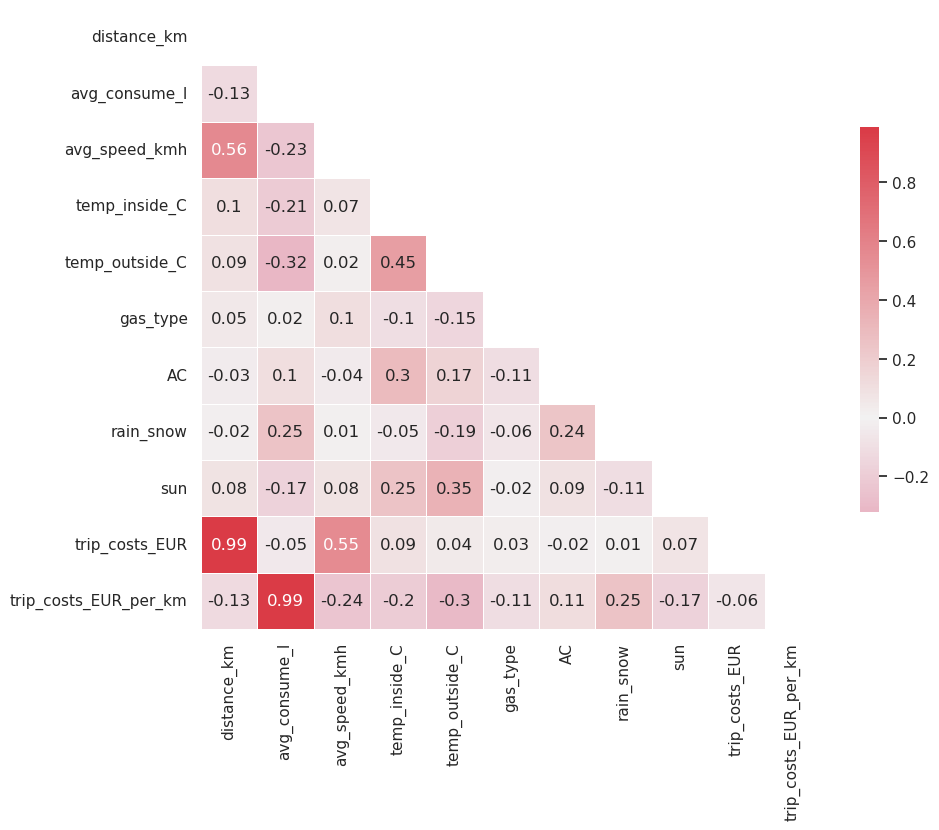

In [176]:
# Checking correlations
# -> Higher average speed correlates with higher distance: Probably, more highway used
# -> Average consume has a negative correlation with distance: Probably, less stop-and-go
# -> Temperature, AC etc. correlations do not surprise
# -> Total trip costs highly depend on distance traveled (which makes sense)
# -> Average costs per km highly depend on average consume (which makes sense)
# (For predictive analyses, either of the variables should be included, respectively, not both)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(style='white')
mask=np.triu(np.ones_like(df.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(df.corr().round(decimals=2),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

## Visualization

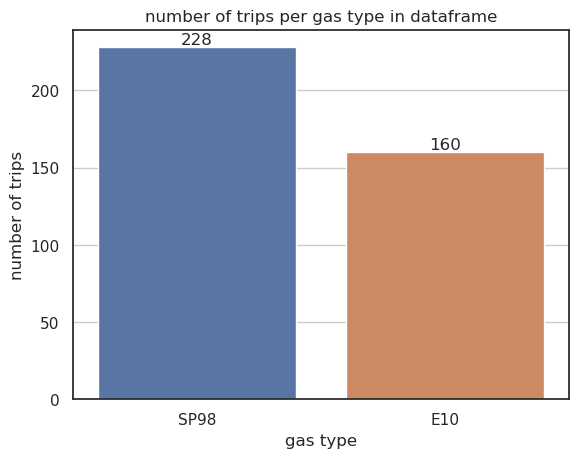

In [177]:
# Plotting trips per gas type (we have more data points on SP98)
ax = sns.countplot(df, x='gas_type')
ax.bar_label(ax.containers[0], fontsize=12)
ax.set(xticklabels=['SP98', 'E10'], 
       xlabel='gas type',
       ylabel='number of trips',
       title='number of trips per gas type in dataframe')
plt.grid(axis='y')
plt.show()

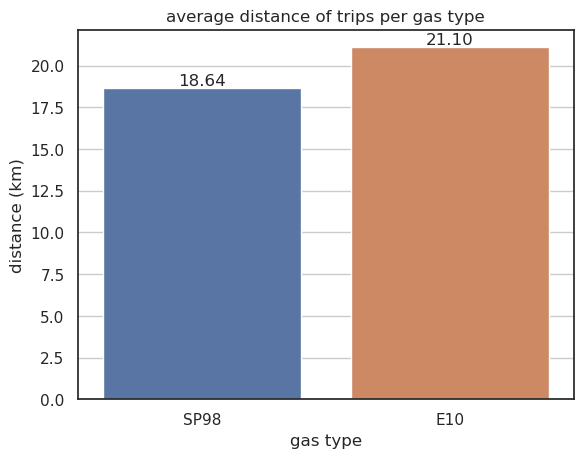

In [178]:
# Plotting average trip lengths per gas_type (trips with E10 were, on average, a bit longer)
ax = sns.barplot(df, x='gas_type', y='distance_km', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12, fmt='%.2f')
ax.set(xticklabels=['SP98', 'E10'], 
       xlabel='gas type',
       ylabel='distance (km)',
       title='average distance of trips per gas type')
plt.grid(axis='y')
plt.show()

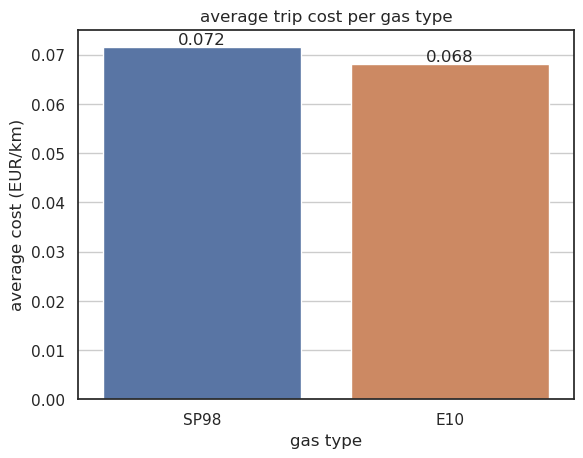

In [179]:
# Plotting trip costs (EUR/km) per gas_type (trips with E10 were, on average, slightly more expensive)
ax = sns.barplot(df, x='gas_type', y='trip_costs_EUR_per_km', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12, fmt='%.3f')
ax.set(xticklabels=['SP98', 'E10'], 
       xlabel='gas type',
       ylabel='average cost (EUR/km)',
       title='average trip cost per gas type')
plt.grid(axis='y')
plt.show()

[Text(0.5, 0, 'distance (km)'),
 Text(0, 0.5, 'average consume (l/100km)'),
 Text(0.5, 1.0, 'average consume per distance and gas type')]

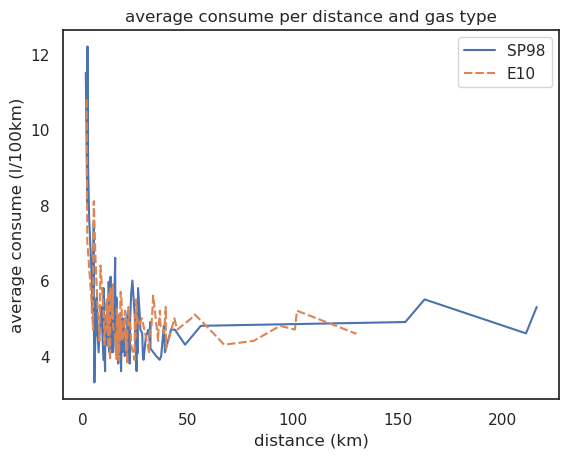

In [180]:
# Plotting distance and related consumption by gas_type (no clear picture here)
consumption_wide = df.pivot_table(index="distance_km", columns="gas_type", values="avg_consume_l")
consumption_wide.columns = ['SP98', 'E10']
ax = sns.lineplot(data=consumption_wide)
ax.set(xlabel='distance (km)', 
       ylabel='average consume (l/100km)', 
       title='average consume per distance and gas type')

[Text(0.5, 0, 'distance (km)'),
 Text(0, 0.5, 'average consume (l/100km)'),
 Text(0.5, 1.0, 'average consume per distance and gas type (distance<=50km)')]

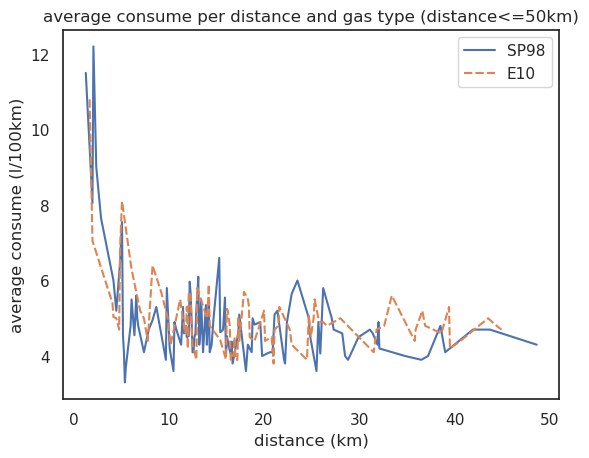

In [181]:
# Filtering out distance over 50 km first (still, no clear picture emerges)
df_shorter_trips = df[df['distance_km'] <= 50]
consumption_wide = df_shorter_trips.pivot_table(index="distance_km", columns="gas_type", values="avg_consume_l")
consumption_wide.columns = ['SP98', 'E10']
ax = sns.lineplot(data=consumption_wide)
ax.set(xlabel='distance (km)', 
       ylabel='average consume (l/100km)', 
       title='average consume per distance and gas type (distance<=50km)')

[Text(0.5, 0, 'distance (km)'),
 Text(0, 0.5, 'average cost (EUR/km)'),
 Text(0.5, 1.0, 'average cost per distance and gas type (distance<=50km)')]

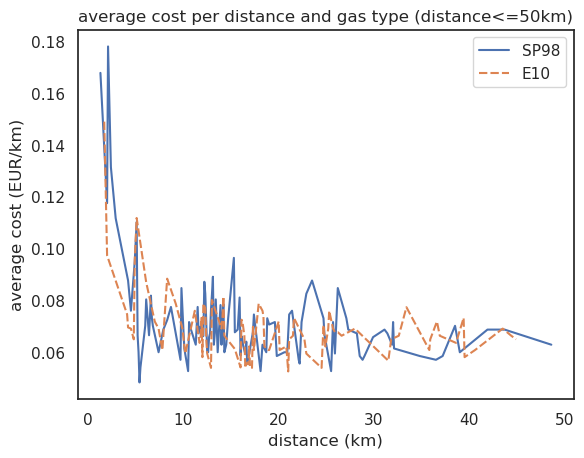

In [182]:
# Avg. costs for trip lengths under 50 km (SP98 could be a bit more expensive, on average)
df_shorter_trips = df[df['distance_km'] <= 50]
consumption_wide = df_shorter_trips.pivot_table(index="distance_km", columns="gas_type", values="trip_costs_EUR_per_km")
consumption_wide.columns = ['SP98', 'E10']
ax = sns.lineplot(data=consumption_wide)
ax.set(xlabel='distance (km)', 
       ylabel='average cost (EUR/km)', 
       title='average cost per distance and gas type (distance<=50km)')

## Predictions

The differences between the fuel types do not seem very large regarding consume and average costs of the trip. Hence, I would predict that changing the fuel type does not make a significant difference. 

We can test this with modeling, predicting the average costs during the trips with a linear regression (I will be using the costs instead of consume as there is a slight price difference between the two fuel types).

In [183]:
# Dropping consume and total trip costs (due to high inter-variable correlations)
df = df.drop(['avg_consume_l', 'trip_costs_EUR'], axis=1)

In [184]:
# X-y-split
X = df.drop('trip_costs_EUR_per_km', axis=1)
y = df[['trip_costs_EUR_per_km']]

In [185]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [186]:
# Preprocessing: Rescaling (PowerTransformer as some of the distributions are skewed)
# (With more time, other scaling methods could be tested here)
scaler = PowerTransformer()

X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [187]:
# Building and fitting model
lm = LinearRegression()
model = lm.fit(X_train_scaled, y_train_scaled)

In [188]:
# Predicting
y_pred = model.predict(X_test_scaled)

# Checking predictions
y_pred = y_pred.reshape(-1,)
y_test_scaled = y_test_scaled.reshape(-1,)
pred_vs_real = pd.DataFrame({'pred': y_pred, 'true': y_test_scaled})
pred_vs_real

,pred,true
0,-0.054945,0.829795
1,0.362913,0.625993
2,0.173184,1.246120
3,0.210780,-0.411372
4,-0.313594,-0.493359
...,...,...
112,0.799442,1.246120
113,-0.271316,-1.728713
114,0.151726,0.625993
115,0.397110,0.289913


In [189]:
# Evaluation metrics
model_mse = mse(y_test_scaled, y_pred)
model_r2 = r2(y_test_scaled,y_pred)
model_rmse = np.sqrt(model_mse)
print(f'r²: {round(model_r2,2)}, \nmse: {round(model_mse,3)}, \nrmse: {round(model_rmse,3)}')

r²: 0.3, 
mse: 0.697, 
rmse: 0.835


In [190]:
# Feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'coef': model.coef_.reshape(-1,)})
feature_importances

,feature,coef
0,distance_km,-0.200200
1,avg_speed_kmh,-0.093957
2,temp_inside_C,-0.112139
3,temp_outside_C,-0.298031
4,gas_type,-0.105700
5,AC,0.064833
6,rain_snow,0.161695
7,sun,-0.056111


[Text(0.5, 0, 'importance (coefficient)'),
 Text(0, 0.5, 'variable'),
 Text(0.5, 1.0, 'feature importances')]

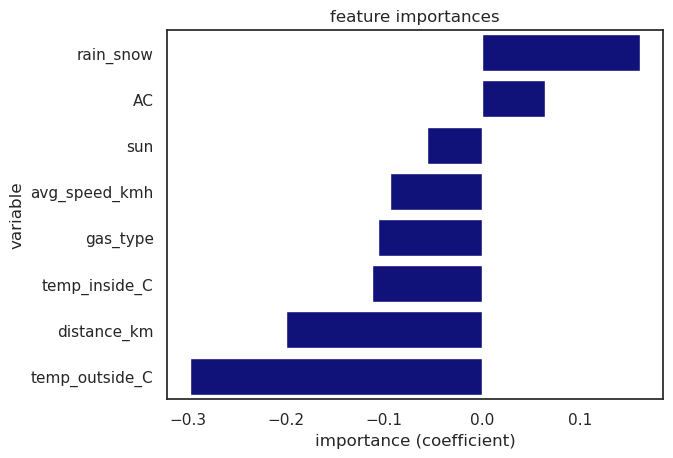

In [191]:
# Plotting importances
feature_importances = feature_importances.sort_values(by='coef', ascending=False)
ax = sns.barplot(y=feature_importances['feature'], x=feature_importances['coef'], color='darkblue')
ax.set(xlabel='importance (coefficient)', 
       ylabel='variable', 
       title='feature importances')

[Text(0.5, 0, 'importance (absolute value of coefficient)'),
 Text(0, 0.5, 'variable'),
 Text(0.5, 1.0, 'absolute feature importances')]

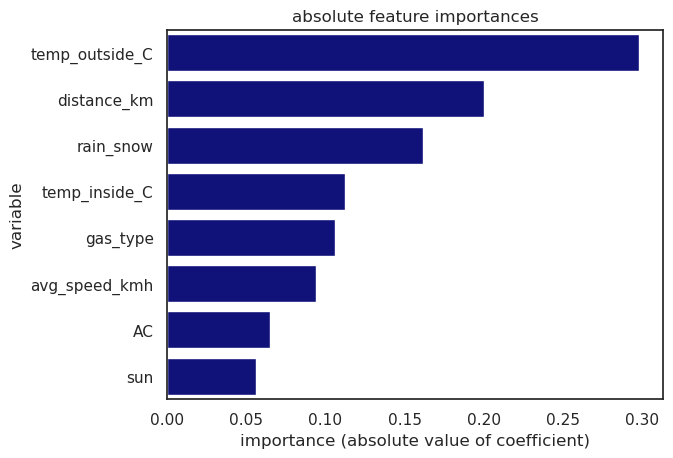

In [192]:
# Plotting absolute importances
feature_importances['coef'] = feature_importances['coef'].apply(lambda x: abs(x))
feature_importances = feature_importances.sort_values(by='coef', ascending=False)
ax = sns.barplot(y=feature_importances['feature'], x=feature_importances['coef'], color='darkblue')
ax.set(xlabel='importance (absolute value of coefficient)', 
       ylabel='variable', 
       title='absolute feature importances')

In [193]:
# The previous library does not provide us with a p value: Assessing p value with statsmodels
# (Just for tendency - with more time, we would have to adjust the coefficients, etc., to this)
print(X_test.columns) # gas_type is predictor 'x5' in model summary below

X_test_const = sm.add_constant(X_test_scaled)
model = sm.OLS(y_test_scaled, X_test_const).fit()
model.summary()

Index(['distance_km', 'avg_speed_kmh', 'temp_inside_C', 'temp_outside_C',
       'gas_type', 'AC', 'rain_snow', 'sun'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8.397
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.19e-09
Time:                        13:41:01   Log-Likelihood:                -137.80
No. Observations:                 117   AIC:                             293.6
Df Residuals:                     108   BIC:                             318.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1439      0.085     -1.690      0.094      -0.313       0.025
x1            -0.3488      0.097     -3.583      0.001      -0.542      -0.156
x2             0.0142      0.089      0.159      0.874      -0.162       0.191
x3             0.0201      0.081      0.247      0.805      -0.141       0.181
x4            -0.4839      0.102     -4.758      0.000      -0.685      -0.282
x5            -0.1585      0.078     -2.028      0.045      -0.314      -0.004
x6             0.1863      0.072      2.574      0.011       0.043       0.330
x7             0.0719      0.090      0.795      0.428      -0.107       0.251
x8            -0.2066      0.134     -1.542      0.126      -0.472       0.059
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.818
Skew:                          -0.272   Prob(JB):                        0.244
Kurtosis:                       2.470   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusions: 
- In general, we are not doing well at all in predicting the fuel costs during the trips (only about 35% of the variance can be explained). With more time, we could test the model more, try different scaling methods or different algorithms for this regression problem, and improve our predictions - but the available data still might limit the quality of our predictions.
- We see that the gas type is a significant predictor for relative trip costs (E10 leads to lower relative costs - probably this is due to heating?), but other factors like the outside temperature (the colder, the higher the consume and the higher the relative trip costs) or the distance traveled (the shorter, the higher the consume and the relative trip costs) are more important. 
- Recommendations: Some of the factors such as trip length and outside temperature are harder to control than the purchase of fuel. When we are looking at keeping the costs in check, switching to E10 would, although the cost difference might not be much, lead to lower costs. Thus, the recommendation is: Get rid of these oldtimers and go for electric cars, as they are the most fuel-efficient and can be quite environmentally effective as well in shared car fleets! If you stick to combustion engine cars, use E10.